# Vitesse du son dans le $Ca_2BrN$

Quentin Bodart - 70362100

## Imports des données

In [71]:
from mp_api.client import MPRester
from pymatgen.phonon.plotter import PhononBSPlotter
import numpy as np
import matplotlib.pyplot as plt
from lmapr1492 import plot_brillouin_zone

mp_key = "cLLBrCi8gU7SqhnPKS4NJqSKB4Y6d0gD"
mp_id = "mp-23009"

with MPRester(mp_key) as m: ph_bs = m.get_phonon_bandstructure_by_material_id(mp_id)
    
plotter = PhononBSPlotter(ph_bs)
plot_data = plotter.bs_plot_data()

distances = plot_data['distances'] # distances[segment][k_point]
frequency = plot_data['frequency'] # frequency[segment][band(or 'mode')][k_point]

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

## Représentation graphique

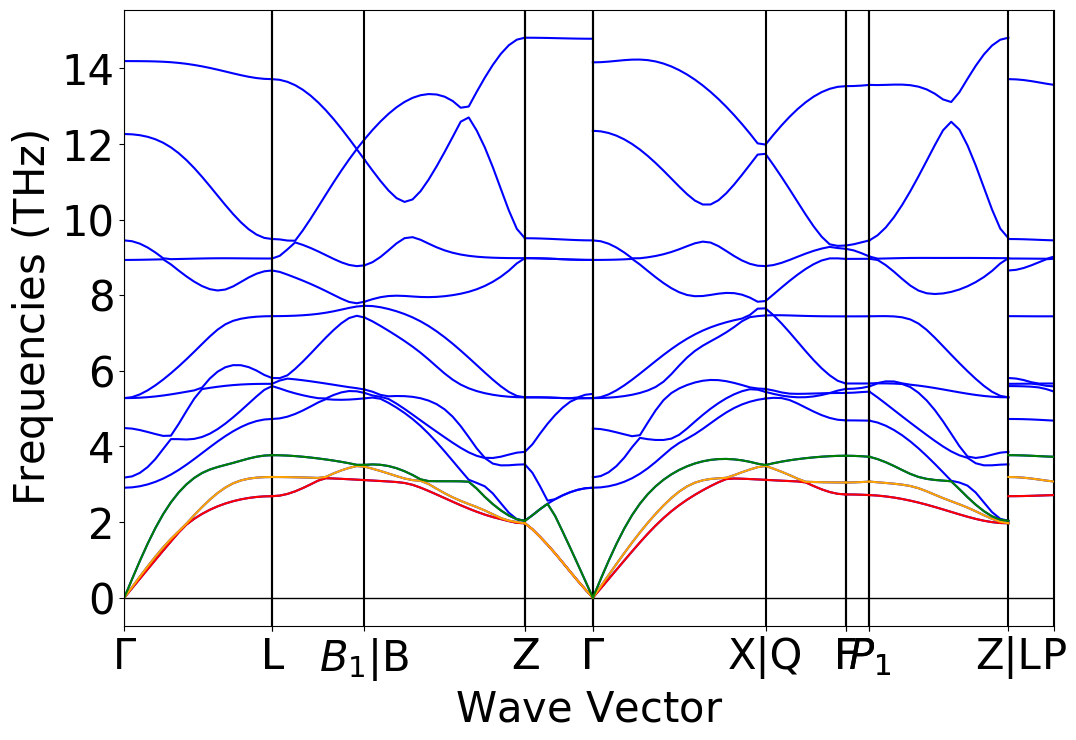

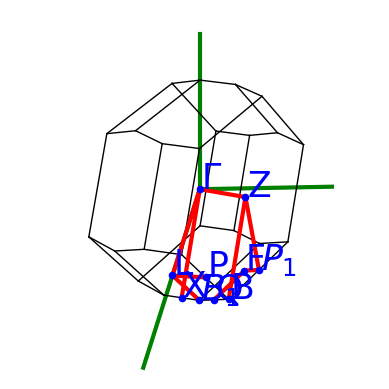

In [72]:
plotter.get_plot()
for i in range(len(distances)):
    plt.plot(distances[i], frequency[i][0], color = 'red')
    plt.plot(distances[i], frequency[i][1], color = 'orange')
    plt.plot(distances[i], frequency[i][2], color = 'green')
plotter.plot_brillouin()

La vitesse du son peut être calculée par $\frac{d\omega}{dk}\vert_{\omega \rightarrow 0}$.  
On peut remarquer sur le graphe ci-dessus que les fréquences des bandes choisies ne s'annulent qu'en $\Gamma$.

On va donc calculer la vitesse du son selon les directions de la zone de Brillouin:
- $\Gamma \rightarrow Z$
- $\Gamma \rightarrow L$
- $\Gamma \rightarrow X$

# Calculs des vitesses

In [73]:
THZ_TO_RAD_S = 2.0*np.pi*1e12
ANG_TO_M = 1e10

def calculate_sound_speed(n_band, n_segment, first_k, last_k):
    """
    Computes the estimated speed of sound for the mode `n_band` at the segment `n_segment`,
    doing a fit on values from `first_k` to `last_k` excluded
    """
    inversion = -1 if last_k < first_k else 1
    freq = [frequency[n_segment][n_band][i] for i in range(first_k,last_k,inversion)]
    dist = [distances[n_segment][i]         for i in range(first_k,last_k,inversion)]
    
    slope, _ = np.polyfit(dist,freq,1)
    
    return slope*THZ_TO_RAD_S/ANG_TO_M*inversion

## Première bande, $\Gamma \rightarrow Z$

In [74]:
speed = calculate_sound_speed(0,0,0,3)
print("Vitesse du son :", speed, "[m/s]")

Vitesse du son : 2985.191227270876 [m/s]


## Deuxième bande, $\Gamma \rightarrow L$

In [75]:
speed = calculate_sound_speed(1,3,-1,-4)
print("Vitesse du son :", speed, "[m/s]")

Vitesse du son : 2747.501861486305 [m/s]


## Troisième bande, $\Gamma \rightarrow X$

In [76]:
speed = calculate_sound_speed(2,4,0,3)
print("Vitesse du son :", speed, "[m/s]")

Vitesse du son : 5724.862896577461 [m/s]
